In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

file_path = "cirrhosis.csv"
data = pd.read_csv(file_path)
print(data.describe)

<bound method NDFrame.describe of       ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL          Placebo  13918   F       N            Y   
..   ...     ...    ...              ...    ...  ..     ...          ...   
413  414     681      D              NaN  24472   F     NaN          NaN   
414  415    1103      C              NaN  14245   F     NaN          NaN   
415  416    1055      C              NaN  20819   F     NaN          NaN   
416  417     691      C              NaN  21185   F     NaN          NaN   
417  418     976      C              NaN  19358   F     NaN          NaN   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  C

## Preprocesamiento de datos: Conversión y manejo de valores faltantes ##


In [33]:
# Convertir variables categóricas a valores numéricos
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Convertir 'Sex' (M/F) a (0/1)
data['Ascites'] = label_encoder.fit_transform(data['Ascites'])
data['Hepatomegaly'] = label_encoder.fit_transform(data['Hepatomegaly'])
data['Spiders'] = label_encoder.fit_transform(data['Spiders'])
data['Edema'] = label_encoder.fit_transform(data['Edema'])
data['Drug'] = label_encoder.fit_transform(data['Drug'])

# Manejar valores faltantes
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])


## Convertir la variable objetivo y dividir características y objetivo ##

In [34]:
# Convertir la variable objetivo 'Stage' a clases discretas
def categorize_stage(stage):
    if stage <= 2:
        return 0  # Etapa temprana
    elif stage <= 4:
        return 1  # Etapa intermedia
    else:
        return 2  # Etapa avanzada

data['Stage'] = data['Stage'].apply(categorize_stage)

# Eliminar columnas irrelevantes
X = data.drop(columns=['ID', 'Status', 'Stage'])  # Características
Y = data['Stage']  # Variable objetivo


## Normalizar características y dividir datos ##

In [35]:
# Normalizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=42)


## Buscar el mejor valor de k ##

In [36]:
# Entrenar modelo KNN
best_k = 0
best_accuracy = 0
for k in range(1, 51):  # Probar con valores de k entre 1 y 51
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred_val = knn.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred_val)
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k


## Entrenar modelo con el mejor k y hacer predicciones ##

In [37]:
# Usar el mejor k encontrado
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, Y_train)

# Hacer predicciones
Y_pred = knn.predict(X_test)


## Evaluar el modelo ##

In [38]:
# Evaluar el modelo
#accuracy = accuracy_score(Y_test, Y_pred)
#report = classification_report(Y_test, Y_pred)

# Matriz de confusión
#conf_matrix = confusion_matrix(Y_test, Y_pred)
#sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Temprana', 'Intermedia', 'Avanzada'], yticklabels=['Temprana', 'Intermedia', 'Avanzada'])
#plt.title("Matriz de Confusión")
#plt.xlabel("Predicción")
#plt.ylabel("Real")
#plt.show()


## Gráfica de precisión por valor de k ##

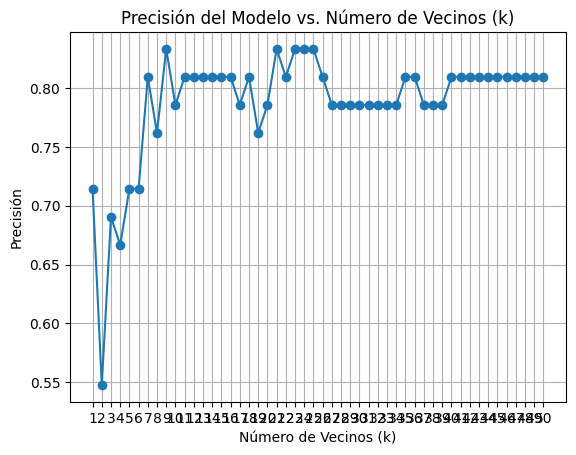

In [39]:
accuracies = []
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred_val = knn.predict(X_test)
    accuracies.append(accuracy_score(Y_test, Y_pred_val))

plt.plot(range(1, 51), accuracies, marker='o')
plt.title("Precisión del Modelo vs. Número de Vecinos (k)")
plt.xlabel("Número de Vecinos (k)")
plt.ylabel("Precisión")
plt.xticks(range(1, 51))
plt.grid()
plt.show()


## Resultados finales ##

In [40]:
# Mostrar resultados
print(f"Mejor k encontrado: {best_k}")
print(f"Precisión del modelo con k={best_k}: {accuracy:.2f}")
print("Reporte de clasificación:")
print(report)


Mejor k encontrado: 9
Precisión del modelo con k=9: 0.83
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.86      0.94      0.90        34

    accuracy                           0.83        42
   macro avg       0.73      0.66      0.68        42
weighted avg       0.81      0.83      0.82        42

